# Part 1 Number 1

##David Morin 10/18/21 116539265

##Importing necessary modules and reading in the data

In [119]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

##Querying the data and storing it in a DataFrame

In [120]:
sql_query = "SELECT Teams.yearID, Teams.teamID, Teams.franchID, Teams.W as wins, Teams.G as games_played, \
                (CAST(Teams.W AS float) / CAST(Teams.G as float)) * 100 as win_percentage, \
                sum(Salaries.salary) as total_payroll \
                FROM Teams \
                INNER JOIN Salaries \
                ON Teams.yearID = Salaries.yearID AND Teams.teamID = Salaries.teamID \
                GROUP BY Teams.yearID, Teams.teamID"
df = pd.read_sql(sql_query, conn)
df.head()

,yearID,teamID,franchID,wins,games_played,win_percentage,total_payroll
0,1985,ATL,ATL,66,162,40.740741,14807000.0
1,1985,BAL,BAL,83,161,51.552795,11560712.0
2,1985,BOS,BOS,81,163,49.693252,10897560.0
3,1985,CAL,ANA,90,162,55.555556,14427894.0
4,1985,CHA,CHW,85,163,52.147239,9846178.0


I queried the data from the Teams and Salaries tables. Since the Teams table only has records from years 1985 and above, the table only shows data starting from that year. There is a couple missing records of data in the Teams table compared to the Salaries table. For this reason, I decided to do an inner join on the keys yearID and teamID, as I am interested as data that is present in both of the tables. Although there are a couple records left out, the inner join allows me to do better data analysis on a tidier set of data.  

# Part 2 Number 2

##Only interested in the data from years at or above 1990

In [121]:
df = df[df['yearID'] >= 1990]
grouping = df.groupby('yearID')

##Creating a new DataFrame and adding the values from the grouped DataFrame

In [122]:
box_plot_pr = pd.DataFrame()

for group, new_df in grouping:
    new_df = pd.DataFrame(new_df)
    new_df = new_df.reset_index()
    box_plot_pr[group] = new_df['total_payroll']

##Making a new plot to show the payroll of teams from 1990-2014 and properly labeling

<AxesSubplot:title={'center':'Total Payroll of MLB Teams from 1990-2014'}, xlabel='Year', ylabel='Total Payroll (Per Hundred Million Dollars)'>

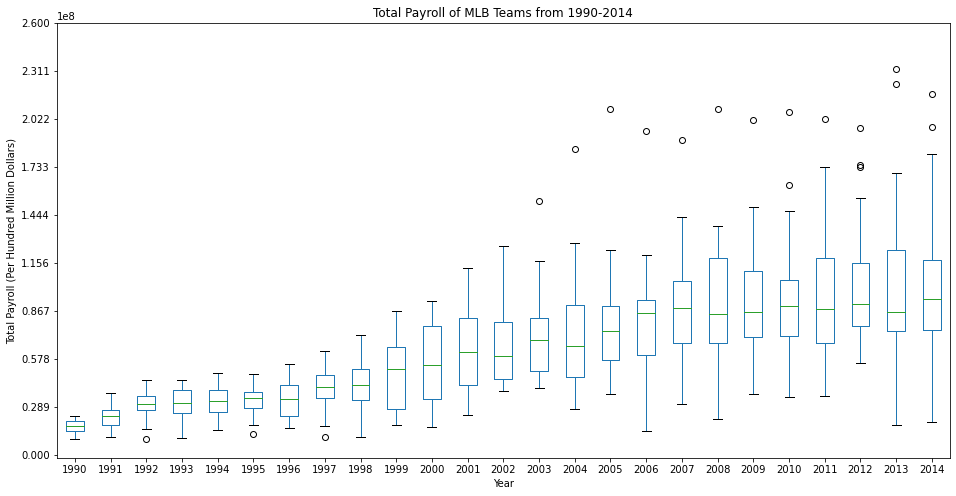

In [123]:
payroll_plot = box_plot_pr.plot.box(figsize=(16, 8), title="Total Payroll of MLB Teams from 1990-2014")
payroll_plot.set_xlabel("Year")
payroll_plot.set_ylabel("Total Payroll (Per Hundred Million Dollars)")
payroll_plot.set_yticks(np.linspace(0, 260000000, 10))
payroll_plot


# Question 1

Based on the plot, it is evident that the total payroll for all MLB teams has generally increased from year to year. The mean payroll, denoted by the horizontal line in the box, appears to get larger as the years increase. Apart from the mean value increasing, the spread of the payrolls also grows larger as the years increase. The range and IQR each year grows bigger (denoted by the size of the boxes and lines growing larger on the individual box plots) as the years increase. 

# Part 2 Number 3

##Create a plot of the mean payroll of mlb teams from 1990-2014

<AxesSubplot:title={'center':'Total Mean Payroll of All MLB Teams from 1990-2014'}, xlabel='Years', ylabel='Total Payroll (Per Hundred Million Dollars)'>

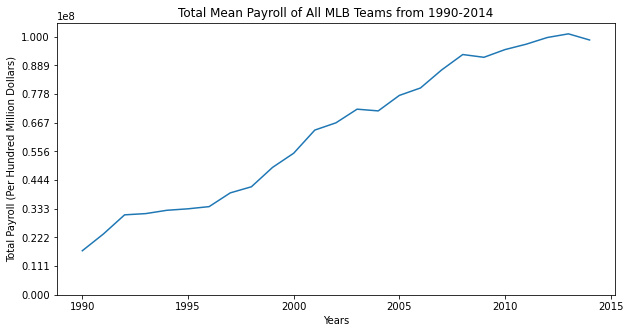

In [124]:
mean_pr = box_plot_pr.mean(axis=0).plot(figsize=(10, 5), title="Total Mean Payroll of All MLB Teams from 1990-2014")
mean_pr.set_xlabel("Years")
mean_pr.set_ylabel("Total Payroll (Per Hundred Million Dollars)")
mean_pr.set_yticks(np.linspace(0, 100000000, 10))
mean_pr

# Part 2 Number 4

##Create a binned DataFrame of 5 time intervals (each of 5 years) from 1990-2014. Then, take the mean of
##the binned DataFrame grouped on the year and team IDs

In [125]:
df_4 = df.copy()

df_4['yearID'] = pd.cut(df_4['yearID'], [1990, 1995, 2000, 2005, 2010, 2015], labels=['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014'], include_lowest=True)

mean_values = df_4.groupby(['yearID', 'teamID']).mean()
mean_values = mean_values[mean_values['wins'].notna()]
grouping = mean_values.groupby('yearID')

##Creates and labels the plot for each interval in the grouping

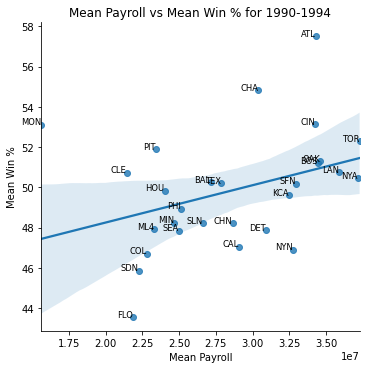

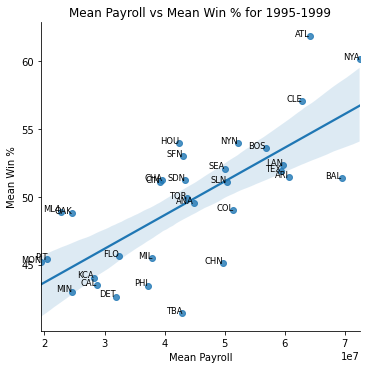

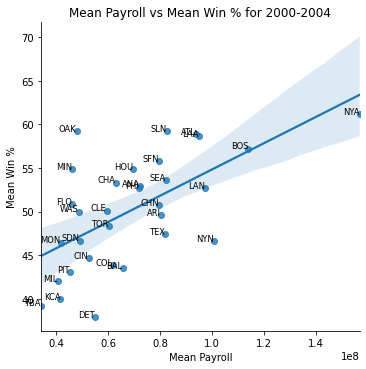

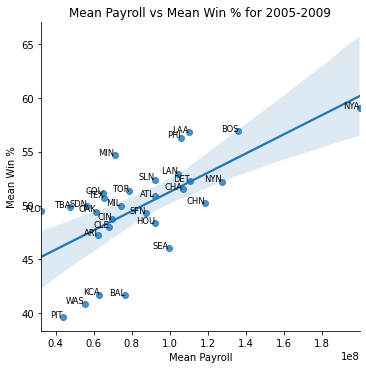

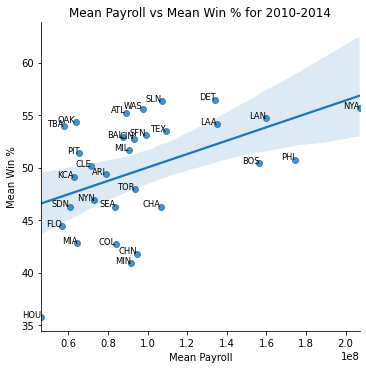

In [126]:
for name, group in grouping:

    group = group.reset_index()
    cor_plot = sns.lmplot(x='total_payroll', y='win_percentage', data=group, fit_reg=True)
    cor_plot.set(title="Mean Payroll vs Mean Win % for " + name, xlabel="Mean Payroll", ylabel="Mean Win %")
    cor_plot = plt.gca()
    
    for i in range(0, group.shape[0]):
        cor_plot.text(group.total_payroll[i], group.win_percentage[i], group.teamID[i], horizontalalignment='right', 
        size='small', color='black', weight='normal')

# Question 2

Based off looking at these plots, the data is very spread apart and does not show a clear correlation between the payroll of teams and their win percentage. There are plenty of teams in each plot who got a higher win percentage than teams with a higher mean payroll. A couple teams that seem particularly good at playing for wins are the New York Yankees and Boston Red Sox. They both usually spend the most out of any team and end up at or above the best fit line for wins. Between the Yankeed and Red Sox, the Yankees definitely seem to be a team that has been the most successful at paying for wins in the 1990-2014 time interval. The Atlanta Braves from 1990-1999 were also having good success paying for wins, but this trend of them winning and spending a lot went down after 1999. The Oakland A's have shown good spending efficiency from the years following 1994. They have consistently been spending one of the least in the league since 1994 and have had a better win percentage than most teams with similar mean payrolls. 

# Part 3 Number 5

##Create a new DataFrame with the standardized payroll included (using the formula provided)

In [127]:
df_5 = pd.DataFrame(df)
df_5['standardized_payroll'] = df_5.groupby('yearID')['total_payroll'].transform(lambda x: (x - x.mean())/x.std())
df_5.head()

,yearID,teamID,franchID,wins,games_played,win_percentage,total_payroll,standardized_payroll
130,1990,ATL,ATL,65,162,40.123457,14555501.0,-0.667275
131,1990,BAL,BAL,76,161,47.204969,9680084.0,-1.959861
132,1990,BOS,BOS,88,162,54.320988,20558333.0,0.924213
133,1990,CAL,ANA,80,162,49.382716,21720000.0,1.232198
134,1990,CHA,CHW,94,162,58.024691,9491500.0,-2.009859


# Part 3 Number 6

##Using the same method from number 4, I create plots for the standardized payroll vs the winning percentage

In [128]:
df_6 = df_5.copy()
df_6['yearID'] = pd.cut(df_6['yearID'], [1990, 1995, 2000, 2005, 2010, 2015], labels=['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014'], include_lowest=True)

mean_values = df_6.groupby(['yearID', 'teamID']).mean()
mean_values = mean_values[mean_values['wins'].notna()]
grouping = mean_values.groupby('yearID')

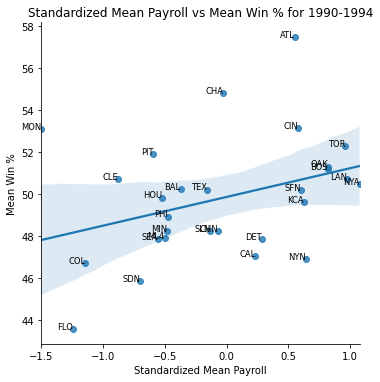

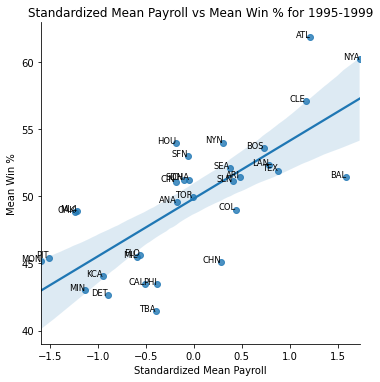

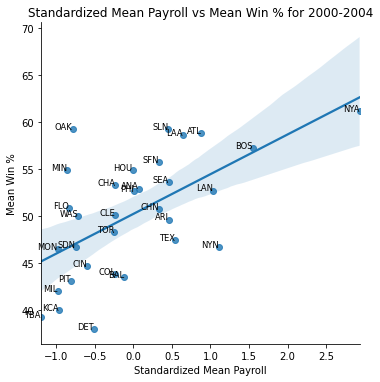

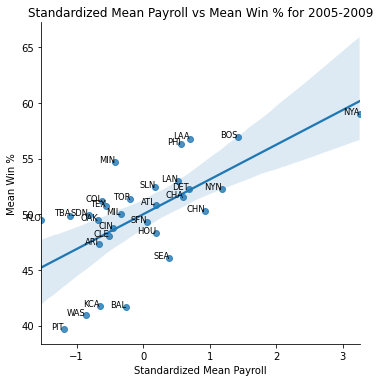

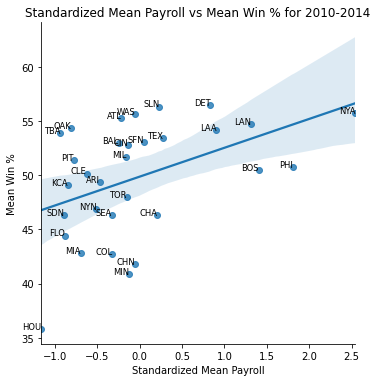

In [129]:
for name, group in grouping:
    
    group = group.reset_index()
    corr_plot = sns.lmplot(x='standardized_payroll', y='win_percentage', data=group, fit_reg=True)
    corr_plot.set(title="Standardized Mean Payroll vs Mean Win % for " + name, xlabel="Standardized Mean Payroll", ylabel="Mean Win %")
    corr_plot = plt.gca()
    
    for i in range(0,group.shape[0]):
        corr_plot.text(group.standardized_payroll[i], group.win_percentage[i], group.teamID[i], horizontalalignment='right', 
        size='small', color='black', weight='normal')

# Question 3

After changing the x-axis to the new standardized payroll variable, the x-axis of the plots is now showing the number of standard deviations away from the mean payroll each team is at. Despite the change in the variable, the spread of the data on the plot seems to be almost identical with only minor differences between the two. 

# Part 3 Number 7

##Creating a new DataFrame from the one in the last problem. Then, I create the scatter plot
##of the standardized payroll and win percentage from 1990-2014 

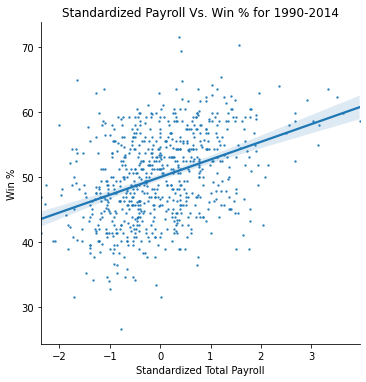

In [130]:
df_7 = pd.DataFrame(df_6)
corr_plot = sns.lmplot(x='standardized_payroll', y='win_percentage', data=df_7, fit_reg=True, scatter_kws={"s": 2})
corr_plot.set(title="Standardized Payroll Vs. Win % for 1990-2014", xlabel="Standardized Total Payroll", ylabel="Win %")

# Part 3 Number 8 

##Creating a new DataFrame and making the expected_win_pct and efficiency columns from the given formulas

In [131]:
df_8 = df_5.copy()
df_8['expected_win_pct'] = 50 + (df_8['standardized_payroll'] * 2.5)
df_8['efficiency'] = df_8['win_percentage'] - df_8['expected_win_pct']

##Making new DataFrames for each team to be plotted

In [132]:
oak = df_8[df_8['teamID'] == 'OAK']
bos = df_8[df_8['teamID'] == 'BOS']
nya = df_8[df_8['teamID'] == 'NYA']
atl = df_8[df_8['teamID'] == 'ATL']
tba = df_8[df_8['teamID'] == 'TBA']

##Creating the line plot of the five teams (OAK, BOS, NYA, ATL, and TBA) and correctly labeling it

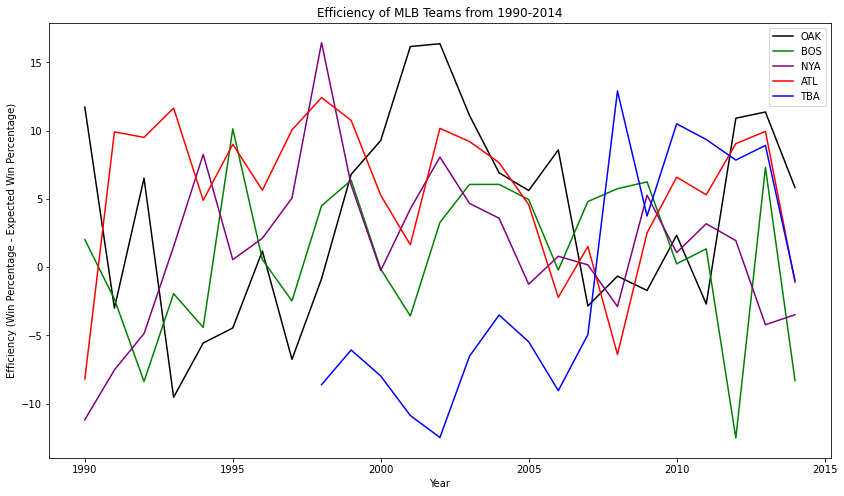

In [133]:
eff_plot = oak.plot(x='yearID', y='efficiency', label='OAK', color='black', figsize=(14, 8))
bos.plot(x='yearID', y='efficiency', label='BOS', color='green', ax=eff_plot)
nya.plot(x='yearID', y='efficiency', label='NYA', color='purple', ax=eff_plot)
atl.plot(x='yearID', y='efficiency', label='ATL', color='red', ax=eff_plot)
tba.plot(x='yearID', y='efficiency', label='TBA', color='blue', ax=eff_plot)

plt.title("Efficiency of MLB Teams from 1990-2014")
plt.xlabel("Year")
plt.ylabel("Efficiency (Win Percentage - Expected Win Percentage)")
plt.show()

# Question 4

The plots that I looked at in the previous two questions are all split into time intervals. They are able to show the correlation between spending on players and win percentage for a set interval of time. This line plot now introduces a variable for efficinecy from a calculated expected wins (dependent on team payroll). It also shows the efficiency for a larger time interval (1990-2014 instead of five intervals of five years each). This efficiency variable as well as the larger length of time represented allows me to see how well a team performed given its spending throughough the years 1990-2014. The plotting of Oakland in this line plot is also able to show the efficiency Oakland had during its Moneyball period. From around 1997 to 2003, the Oakland Athletics went from declining in spending efficiency to completely turning it around and rapidly increasing to an efficiency of over 15. They had the highest efficiency during this time interval (1997 to 2003) as well as the highest efficiency (tied with the New York Yankees) of all five teams recorded in the line plot. Therefore, their strategy of using data analysis to pay for cheaper players that are as efficient for winning games as more expensive players worked for them.